<a href="https://colab.research.google.com/github/uddeshya-23/Clustering-Data-analysis/blob/main/Cricket_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cricket Data Analysis**
Choose strike rate and average as the two factors on which you will cluster the data. You don’t need to clean the data. Just scale the data using the scale command and create the clusters.



Pointers before you proceed:

standardise all parameters using standard_scaler.fit_transform() and save the output to a variable before you proceed. (check the K-Means code)
Choose random_state=100 for running K-Means in Python with SKLearn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [4]:
crick=pd.read_csv('/content/drive/MyDrive/Upgrad Data/Cricket.csv', sep=',',encoding='ISO-8859-1', header=0)
crick.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


# Prepare for Data Modelling

In [9]:
crick2=crick[['Player', 'Ave', 'SR']]
print(crick2.head())


                        Player    Ave     SR
0         SR Tendulkar (INDIA)  44.83  86.23
1  KC Sangakkara (Asia/ICC/SL)  41.98  78.86
2         RT Ponting (AUS/ICC)  42.03  80.39
3      ST Jayasuriya (Asia/SL)  32.36  91.20
4   DPMD Jayawardene (Asia/SL)  33.37  78.96


In [10]:
crick2.describe()

,Ave,SR
count,79.000000,79.000000
mean,38.523291,79.295316
std,5.919093,9.925307
min,23.570000,60.570000
25%,34.600000,73.725000
50%,37.870000,77.730000
75%,41.845000,85.180000
max,53.940000,117.000000




1.   Batting Average seems to be on a lower side as seen in ODI matches.
2.   Strike Rate is decent enough.




In [11]:
# subsetting the df to scaling variables
df = crick2[['Ave', 'SR']]

# instantiate an object called scaler
scaler = StandardScaler()

# fit_transform
odi_scaled = scaler.fit_transform(df)
odi_scaled

array([[ 1.07229395,  0.70315153],
       [ 0.58772461, -0.0441395 ],
       [ 0.59622582,  0.1109969 ],
       [-1.04790945,  1.20709133],
       [-0.87618487, -0.03399986],
       [ 0.16946476, -0.51259058],
       [ 0.99238251, -0.64947564],
       [ 0.42450125, -0.56734461],
       [ 0.108256  , -0.8167796 ],
       [ 0.33268811,  0.02176813],
       [ 0.12695867,  0.70315153],
       [ 0.54181804, -0.42538973],
       [-0.44772356,  1.78910632],
       [ 2.17575185,  0.95258652],
       [-0.2725985 , -0.53489778],
       [ 2.5549061 ,  2.1247282 ],
       [-0.61604765,  0.1860302 ],
       [-0.20288853,  0.58958763],
       [ 0.11675721,  0.13938788],
       [ 0.52311536, -0.86747777],
       [-0.3355075 ,  0.84916225],
       [ 0.48400977, -1.64315977],
       [-0.16208269, -1.17369472],
       [ 0.14056062, -0.24287632],
       [-0.590544  ,  2.53842527],
       [ 2.62121559,  1.1857981 ],
       [-0.40691772,  0.4020044 ],
       [-2.5424233 ,  3.82311689],
       [-1.04110847,

In [12]:
# converting it into a dataframe as it is in the Numpy array form

odi_scaled = pd.DataFrame(odi_scaled)
odi_scaled.columns = ['Average' , 'Strike_Rate']
odi_scaled.head()

,Average,Strike_Rate
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [13]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [14]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(odi_scaled)

0.7954409044969073

+ As seen our data has a high tendency to cluster

## K-MEANS MODELLING

In [15]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50 , random_state=100)
kmeans.fit(odi_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=100)

In [16]:
kmeans.labels_

array([3, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 3, 2, 3, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 3, 2, 0, 2, 1, 2, 2, 1, 2, 3, 2, 2, 1, 3, 1, 2, 2, 3, 2,
       2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 1, 3, 3, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2], dtype=int32)

## Finding the Optimal Number of Clusters
Now you might be thinking why the number of clusters is taken as 4 and not any other number. To find the optimum number of clusters, we use two techniques - the elbow curve method and the silhouette score method. Let's learn about both of them in detail

### SSD - Sum of Squared Distances

In [17]:
# elbow curve
ssd = []

range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=4, max_iter=50, random_state=100)
    kmeans.fit(odi_scaled)

    ssd.append(kmeans.inertia_)

ssd

[50.27874825117195,
 50.27874825117195,
 50.27874825117195,
 50.27874825117195,
 50.27874825117195,
 50.27874825117195,
 50.27874825117195]

# Also let's plot it


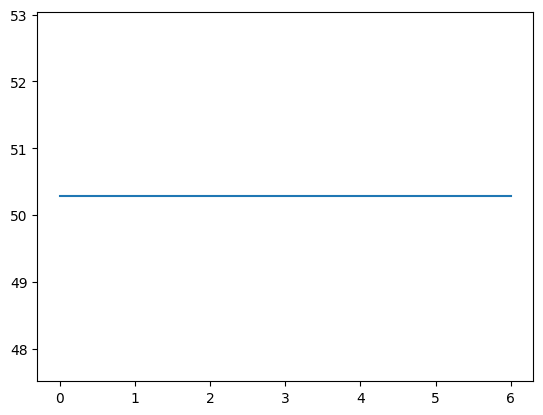

In [18]:
plt.plot(ssd)

+ On the X-axis clusters are represented by the index of that list created in ssd which is correlated to clusters i.e  0 represents 2 clusters, 1 represents 3 clusters and so on.
+ the ssd is not decresing at all (+ SSD is nothing by sum of squared distances of indvidual samples to their closet cluster center).
+ Generally, ssd decreases when the number of clusters increases. But to find the optimal number of clusters, we have only only a straight line signifying no results. Hence, let's use another metric to confirm this.

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of, bigger the p, better.    

$q$ is the mean intra-cluster distance to all the points in its own cluster, smaller the q, better.

* The value of the silhouette score range lies between -1 to 1.

* A score closer to 1 indicates that the data point is very similar to other data points in the same cluster and dis-similar to the data points in the neighbor cluster, (Good cluster)

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster. (Bad cluster)

conditions:
+ p and q is defined for each datapoint.
+ inter-cluster distance between two clusters must be high.
+ intra-cluster distance between two points within a cluster must be low.

In [19]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:

    kmeans = KMeans(n_clusters=4, max_iter=50, random_state=100)
    kmeans.fit(odi_scaled)

    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(odi_scaled, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.3836904829421138
For n_clusters = 3, the silhouette score is 0.3836904829421138
For n_clusters = 4, the silhouette score is 0.3836904829421138
For n_clusters = 5, the silhouette score is 0.3836904829421138
For n_clusters = 6, the silhouette score is 0.3836904829421138
For n_clusters = 7, the silhouette score is 0.3836904829421138
For n_clusters = 8, the silhouette score is 0.3836904829421138


In [20]:
# assign the label 0, 1, 2 and 3 to original dataframe having customerid
crick2['cluster_id'] = cluster_labels
crick2

,Player,Ave,SR,cluster_id
0,SR Tendulkar (INDIA),44.83,86.23,3
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,1
2,RT Ponting (AUS/ICC),42.03,80.39,1
3,ST Jayasuriya (Asia/SL),32.36,91.20,0
4,DPMD Jayawardene (Asia/SL),33.37,78.96,2
...,...,...,...,...
74,CG Greenidge (WI),45.03,64.92,1
75,Misbah-ul-Haq (PAK),43.40,73.75,1
76,PD Collingwood (ENG),35.36,76.98,2
77,A Symonds (AUS),39.75,92.44,0


In [21]:
crick2[['Player', 'cluster_id']]

,Player,cluster_id
0,SR Tendulkar (INDIA),3
1,KC Sangakkara (Asia/ICC/SL),1
2,RT Ponting (AUS/ICC),1
3,ST Jayasuriya (Asia/SL),0
4,DPMD Jayawardene (Asia/SL),2
...,...,...
74,CG Greenidge (WI),1
75,Misbah-ul-Haq (PAK),1
76,PD Collingwood (ENG),2
77,A Symonds (AUS),0


In [23]:
# Visualising all 4 clusters:
import plotly
import plotly.express as px
fig = px.scatter(crick2, x='Ave', y='SR', trendline = 'ols', hover_name = 'Player', color='cluster_id',
                title = "ODI", width = 1000, height = 700)
fig.show()

In [25]:
crick2[crick2['cluster_id'] == 3] # Low SR, High Ave = C

,Player,Ave,SR,cluster_id
0,SR Tendulkar (INDIA),44.83,86.23,3
13,MS Dhoni (Asia/INDIA),51.32,88.69,3
15,AB de Villiers (Afr/SA),53.55,100.25,3
25,V Kohli (INDIA),53.94,90.99,3
34,HM Amla (SA),50.25,89.05,3
38,MG Bevan (AUS),53.58,74.16,3
42,IVA Richards (WI),47.00,90.20,3
63,MJ Guptill (NZ),43.30,87.73,3
64,MEK Hussey (AUS),48.15,87.16,3


In [27]:
crick2[crick2['cluster_id'] == 2] # Low SR, Low Ave = B

,Player,Ave,SR,cluster_id
4,DPMD Jayawardene (Asia/SL),33.37,78.96,2
14,M Azharuddin (INDIA),36.92,74.02,2
16,PA de Silva (SL),34.90,81.13,2
22,MS Atapattu (SL),37.57,67.72,2
26,HH Gibbs (SA),36.13,83.26,2
28,SP Fleming (ICC/NZ),32.40,71.49,2
30,SR Waugh (AUS),32.90,75.91,2
31,A Ranatunga (SL),35.84,77.90,2
33,Younis Khan (PAK),31.24,75.29,2
35,Saleem Malik (PAK),32.88,76.41,2


In [28]:
crick2[crick2['cluster_id'] == 1] # Low SR, High Ave = D

,Player,Ave,SR,cluster_id
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,1
2,RT Ponting (AUS/ICC),42.03,80.39,1
5,Inzamam-ul-Haq (Asia/PAK),39.52,74.24,1
6,JH Kallis (Afr/ICC/SA),44.36,72.89,1
7,SC Ganguly (Asia/INDIA),41.02,73.70,1
8,R Dravid (Asia/ICC/INDIA),39.16,71.24,1
9,BC Lara (ICC/WI),40.48,79.51,1
11,Mohammad Yousuf (Asia/PAK),41.71,75.10,1
18,Saeed Anwar (PAK),39.21,80.67,1
19,S Chanderpaul (WI),41.60,70.74,1


In [29]:
crick2[crick2['cluster_id'] == 0]  # High SR, High Ave = A

,Player,Ave,SR,cluster_id
3,ST Jayasuriya (Asia/SL),32.36,91.20,0
10,TM Dilshan (SL),39.27,86.23,0
12,AC Gilchrist (AUS/ICC),35.89,96.94,0
17,CH Gayle (ICC/WI),37.33,85.11,0
20,Yuvraj Singh (Asia/INDIA),36.55,87.67,0
24,V Sehwag (Asia/ICC/INDIA),35.05,104.33,0
27,Shahid Afridi (Asia/ICC/PAK),23.57,117.00,0
50,BB McCullum (NZ),30.41,96.37,0
57,EJG Morgan (ENG/IRE),38.73,88.62,0
59,SR Watson (AUS),40.54,90.44,0
